In [2]:
import pandas as pd

In [3]:
weather=pd.read_csv('Weather Training Data.csv')
weather.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [5]:
#verifying percentage of missing values
weather.isnull().mean()*100

row ID            0.000000
Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [6]:
#removing features with missing values more than 30% and irrelevant features
weather=weather.drop(['row ID','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        99073 non-null  float64
 1   MaxTemp        99286 non-null  float64
 2   Rainfall       98537 non-null  float64
 3   WindGustDir    92995 non-null  object 
 4   WindGustSpeed  93036 non-null  float64
 5   WindDir9am     92510 non-null  object 
 6   WindDir3pm     96868 non-null  object 
 7   WindSpeed9am   98581 non-null  float64
 8   WindSpeed3pm   97681 non-null  float64
 9   Humidity9am    98283 non-null  float64
 10  Humidity3pm    97010 non-null  float64
 11  Pressure9am    89768 non-null  float64
 12  Pressure3pm    89780 non-null  float64
 13  Temp9am        98902 non-null  float64
 14  Temp3pm        97612 non-null  float64
 15  RainToday      98537 non-null  object 
 16  RainTomorrow   99516 non-null  int64  
dtypes: float64(12), int64(1), object(4)
memory usage: 

In [8]:
#fill missing continous features
continous_columns = weather.select_dtypes(include=['float64','int64']).drop(['RainTomorrow'],axis=1).columns
for c in continous_columns:
    mean = weather[c].mean()
    weather[c]=weather[c].fillna(mean)

#fill missing categorical features
categorical_columns = weather.select_dtypes(include=['object']).columns
for c in categorical_columns:
    most_frequent_value = weather[c].mode()[0]
    weather[c]=weather[c].fillna(most_frequent_value)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        99516 non-null  float64
 1   MaxTemp        99516 non-null  float64
 2   Rainfall       99516 non-null  float64
 3   WindGustDir    99516 non-null  object 
 4   WindGustSpeed  99516 non-null  float64
 5   WindDir9am     99516 non-null  object 
 6   WindDir3pm     99516 non-null  object 
 7   WindSpeed9am   99516 non-null  float64
 8   WindSpeed3pm   99516 non-null  float64
 9   Humidity9am    99516 non-null  float64
 10  Humidity3pm    99516 non-null  float64
 11  Pressure9am    99516 non-null  float64
 12  Pressure3pm    99516 non-null  float64
 13  Temp9am        99516 non-null  float64
 14  Temp3pm        99516 non-null  float64
 15  RainToday      99516 non-null  object 
 16  RainTomorrow   99516 non-null  int64  
dtypes: float64(12), int64(1), object(4)
memory usage: 

In [9]:
#Convert categorical features to continous

from sklearn.preprocessing import LabelEncoder

label_encoders={}
for c in categorical_columns:
    label_encoders[c] = LabelEncoder()
    weather[c]=label_encoders[c].fit_transform(weather[c])

weather.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
3,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
4,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0


In [10]:
#Normalization continous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
weather[continous_columns] = scaler.fit_transform(weather[continous_columns])

weather.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.191910,-0.044818,-0.207557,13,0.306357,13,14,0.676626,0.613461,0.112555,-1.434774,-1.478566,-1.223345,-0.010827,0.017285,0,0
1,-0.749029,0.264744,-0.278597,14,0.306357,6,15,-1.129170,0.384110,-1.311772,-1.288534,-1.049122,-1.118737,0.035548,0.381450,0,0
2,0.834885,1.277857,-0.160198,13,0.077905,1,7,-0.790583,0.154759,0.692836,-0.898561,-1.019505,-1.387729,0.128300,1.168047,0,0
3,0.380098,0.912011,-0.254917,14,1.220168,13,13,0.563764,0.613461,-0.731491,-1.386028,-1.256440,-1.477393,0.561142,1.051514,0,0
4,-0.701982,0.489880,-0.278597,13,-0.379000,10,13,-0.903445,-0.189268,-1.100761,-1.581014,-0.634487,-0.775026,-0.103579,0.556249,0,0


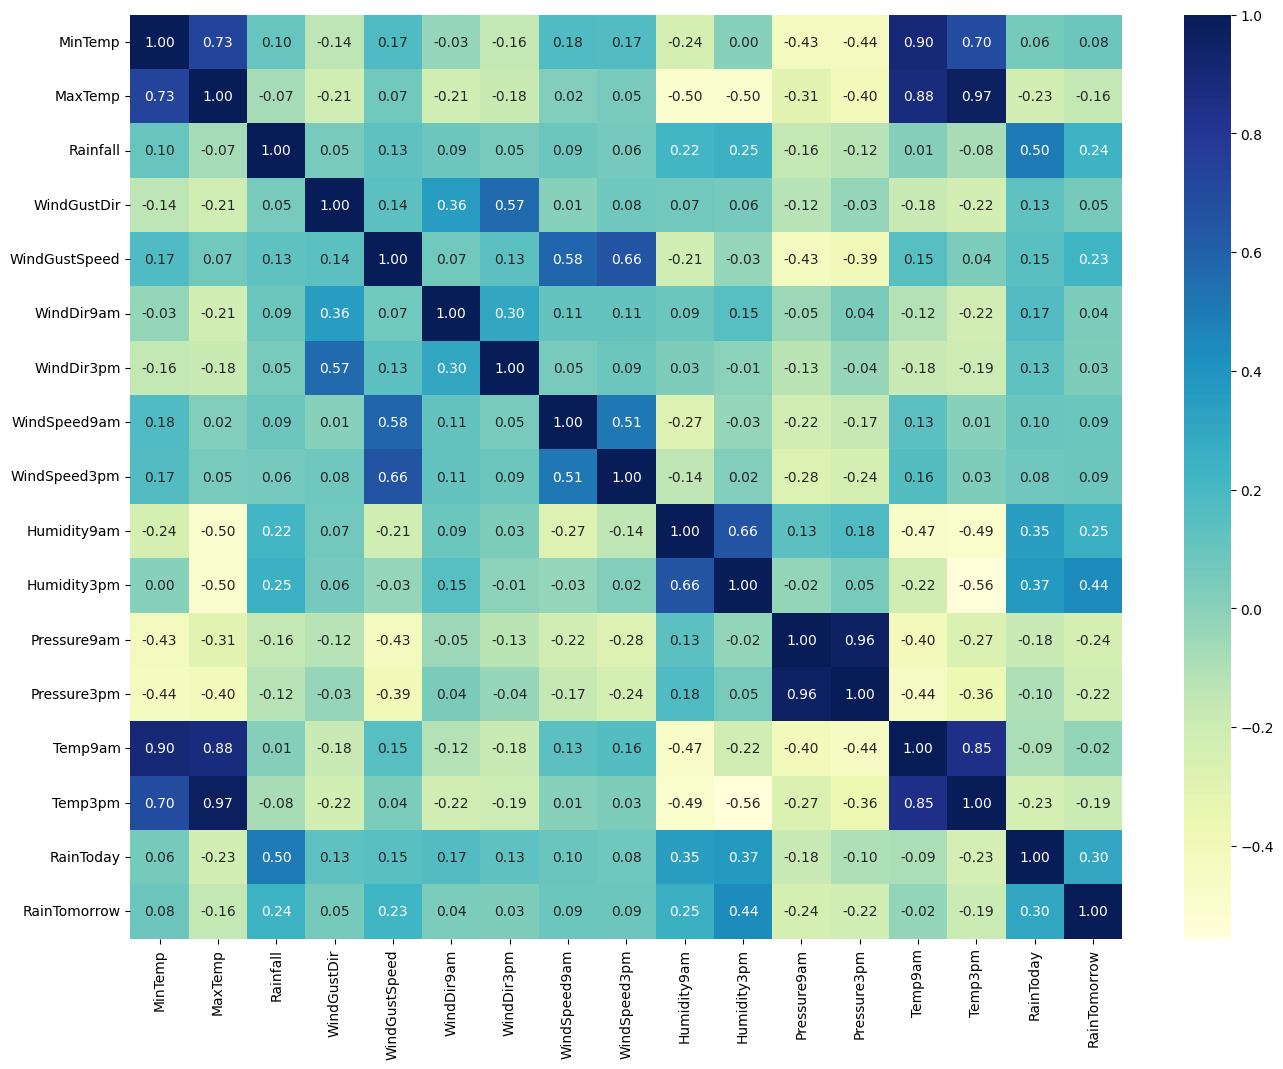

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.subplots(figsize=(16,12))
sns.heatmap(weather.corr(),cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()


In [14]:
#Step 2. Divide features=X and target=Y
X=weather.drop(['RainTomorrow'],axis=1)
Y=weather['RainTomorrow']
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.191910,-0.044818,-0.207557,13,0.306357,13,14,0.676626,0.613461,0.112555,-1.434774,-1.478566,-1.223345,-0.010827,0.017285,0
1,-0.749029,0.264744,-0.278597,14,0.306357,6,15,-1.129170,0.384110,-1.311772,-1.288534,-1.049122,-1.118737,0.035548,0.381450,0
2,0.834885,1.277857,-0.160198,13,0.077905,1,7,-0.790583,0.154759,0.692836,-0.898561,-1.019505,-1.387729,0.128300,1.168047,0
3,0.380098,0.912011,-0.254917,14,1.220168,13,13,0.563764,0.613461,-0.731491,-1.386028,-1.256440,-1.477393,0.561142,1.051514,0
4,-0.701982,0.489880,-0.278597,13,-0.379000,10,13,-0.903445,-0.189268,-1.100761,-1.581014,-0.634487,-0.775026,-0.103579,0.556249,0


In [15]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [16]:
#Step 3. Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [17]:
#Step 4. Configure Model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [18]:
#Step 5. Train
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#Step 6. Test
test_predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.8158661575562701

In [20]:
#Step 7. Evaluation metric
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
cm

array([[14239,  1185],
       [ 2480,  2000]])

In [22]:
import joblib
joblib.dump(clf, 'rainfall.mdl')

['rainfall.mdl']

In [32]:
#15158
idx=0
for a in test_predictions:
    if a == 1:
        print(idx)
        break
    idx=idx+1

6


In [42]:
idx=0
for index,a in X_test.iterrows():
    if idx==6:
        print(a,index)
        break
    idx=idx+1

MinTemp           0.066451
MaxTemp          -1.142357
Rainfall          5.475627
WindGustDir       8.000000
WindGustSpeed    -0.912056
WindDir9am        8.000000
WindDir3pm       10.000000
WindSpeed9am     -0.113410
WindSpeed3pm     -1.106672
Humidity9am       1.589635
Humidity3pm       2.172477
Pressure9am       0.431719
Pressure3pm       0.390605
Temp9am          -0.675548
Temp3pm          -1.031511
RainToday         1.000000
Name: 34776, dtype: float64 34776
